### Goal: Provide a live presentation accompanied by slides (Google Slides, Canva, etc.) during which you provide a summary of your analysis of the Telco Churn dataset and provide one recommendation to reduce customer churn. Be sure to include a visualization showing the projected impact of your recommendation.
- Instructor Tip: It is extremely difficult to precisely quantify how your recommendation might affect Telco's business with the limited information you have.
- In situations like this, some assumptions will have to be made (i.e. if we forced month-to-month customers to switch to a 1 year plan, the percentage that agreed to the switch would have a churn rate similar to current 1 year customers. After accounting for X% of customers not willing to switch, I estimate an overall reduction in churn in the remaining customers of X%, leading to a revenue savings of $Y)
- Your recommendation cannot be to eliminate the month-to-month payment type.
- Remember, the presentation will be part of a larger meeting schedule and therefore cannot last longer than 3-minutes.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
df = pd.read_csv("Copy of Jennifer Eyring - jemison_spreadsheet_exercises - Table1_Copy.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Copy of Jennifer Eyring - jemison_spreadsheet_exercises - Table1_Copy.csv'

In [2]:
df.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
is_senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
phone_service,1,2
internet_service,1,1
contract_type,1,0
payment_type,Mailed check,Mailed check
monthly_charges,65.6,59.9


In [3]:
#clean up data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          7049 non-null   object 
 1   gender               7049 non-null   object 
 2   is_senior_citizen    7049 non-null   int64  
 3   partner              7049 non-null   object 
 4   dependents           7049 non-null   object 
 5   phone_service        7049 non-null   int64  
 6   internet_service     7049 non-null   int64  
 7   contract_type        7049 non-null   int64  
 8   payment_type         7049 non-null   object 
 9   monthly_charges      7049 non-null   float64
 10  total_charges        7038 non-null   float64
 11  churn                7049 non-null   object 
 12  tenure               7049 non-null   float64
 13  is_female            7049 non-null   bool   
 14  has_churned          7049 non-null   bool   
 15  has_phone            7049 non-null   b

In [4]:
df.avg_monthly_charges.head()

0    65.6
1    59.9
2    73.9
3      98
4    83.9
Name: avg_monthly_charges, dtype: object

In [5]:
df.avg_monthly_charges= df.avg_monthly_charges.astype('float') 

ValueError: could not convert string to float: '#DIV/0!'

In [ ]:
df.dtypes

In [ ]:
df.avg_monthly_charges.value_counts()

In [ ]:
## Had to drop column to create as a float
df.drop(columns=["avg_monthly_charges"], inplace=True)

In [ ]:
df['avg_monthly_charges']= df.monthly_charges / df.tenure

In [ ]:
df.info()

In [ ]:
df.churn.hist()

In [ ]:
df.churn.value_counts()

In [ ]:
df.churn.unique() #cleaning up duplicated boolean 

In [ ]:
df.churn.str.strip().unique()

In [ ]:
df.churn=df.churn.str.strip()

In [ ]:
df.churn.value_counts()

In [ ]:
#Finding the proportion of members that have churned:

df[df.churn == "Yes"].shape[0] / df.shape [0]

### Takeaway:
- Telco Churn rate is 6% higher (with a 27% churn) than the telecommunication industrys average churn of 21%
- data source: https://www.smartlook.com/blog/customer-churn-retention/#:~:text=The%20average%20churn%20rate%20in,take%20action%20to%20reduce%20it.

In [ ]:
# The number of members that have churned:
(df.churn == "Yes").sum()

### Quantify the loss of these members:
    - Cost of aquiring new customers is: 
    - Cost of losing these members (if churn stays True for the year):

In [ ]:
round(df[df.churn == "Yes"].monthly_charges.sum() * 12)

### Takeaway:
- If the 27% churn rate stays True for the year, Telco will lose $1.7m for the year

## Comparisons to find driver(s) for churn:

- 1) Is there any relations between churn and the monthly payment types? (ie. auto transfers vs checks)

In [ ]:
sns.barplot(x="monthly_charges", y="payment_type", hue='churn', data=df)

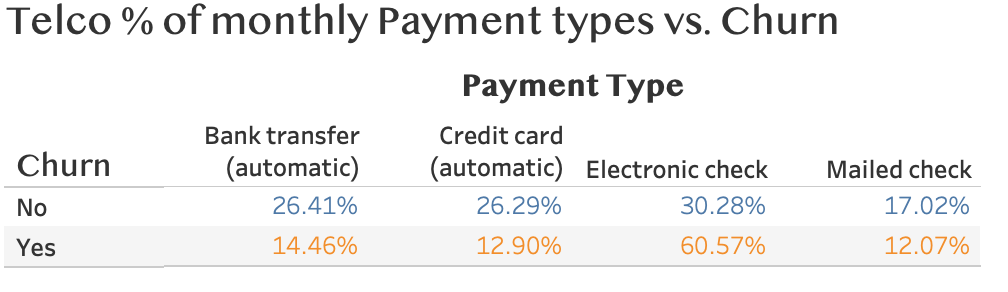

- I included a Tableau-made chart to show the percentages (by 'yes'/'no' of churn) to show why the barplot makes it look like there aws more "yes churns" than not

## Takeaway:
### It DOES seem that payment type does have a part to play in churn. Percentage-wise, more people that churned were paying by electronic checks.

### On the other side, less people were likely to churn if their payments were automatic. 

### Some other telecom and financial companies suggest that if majority of churns are coming from electronic check and subscription transfers, these could also be due to involuntary churns, 
#### (ie people that did not mean to leave but just did not pay or receive their reminders for month-to-month payments.)

### A good suggestion, to elimate any unnecessary involuntary churn would be to have a Direct Debit be the go-to for month-to-month subscriptions to help eliminate moments when customers may either 1) miss/forget to pay that month, and 2) Will not bounce as it would work similar to a Bank transfer. 

### resource: https://www.chargebee.com/resources/guides/involuntary-churn-payment-failed/

## [SUGGESTION ONE:]
### Use an e-check, ACH or online banking transfer system that will accept the ease of wiring banking electronically for subscription purchases AND can allow the initial members' set up to be an automatic one. 
- Teleco can then send out monthly emails as reminders that their monthly payment will be due, and if they want to cancel for the following month, to state the due date of that. 

### How to find more info on this:
- Data for how many dropped accounts make up churns.
- Rates of on-time payments for month-to-month customers.

__________________________________________________________________________

- 2) What is the relation of month-to-month payments vs. annual AND adding in the relationship to contract types?

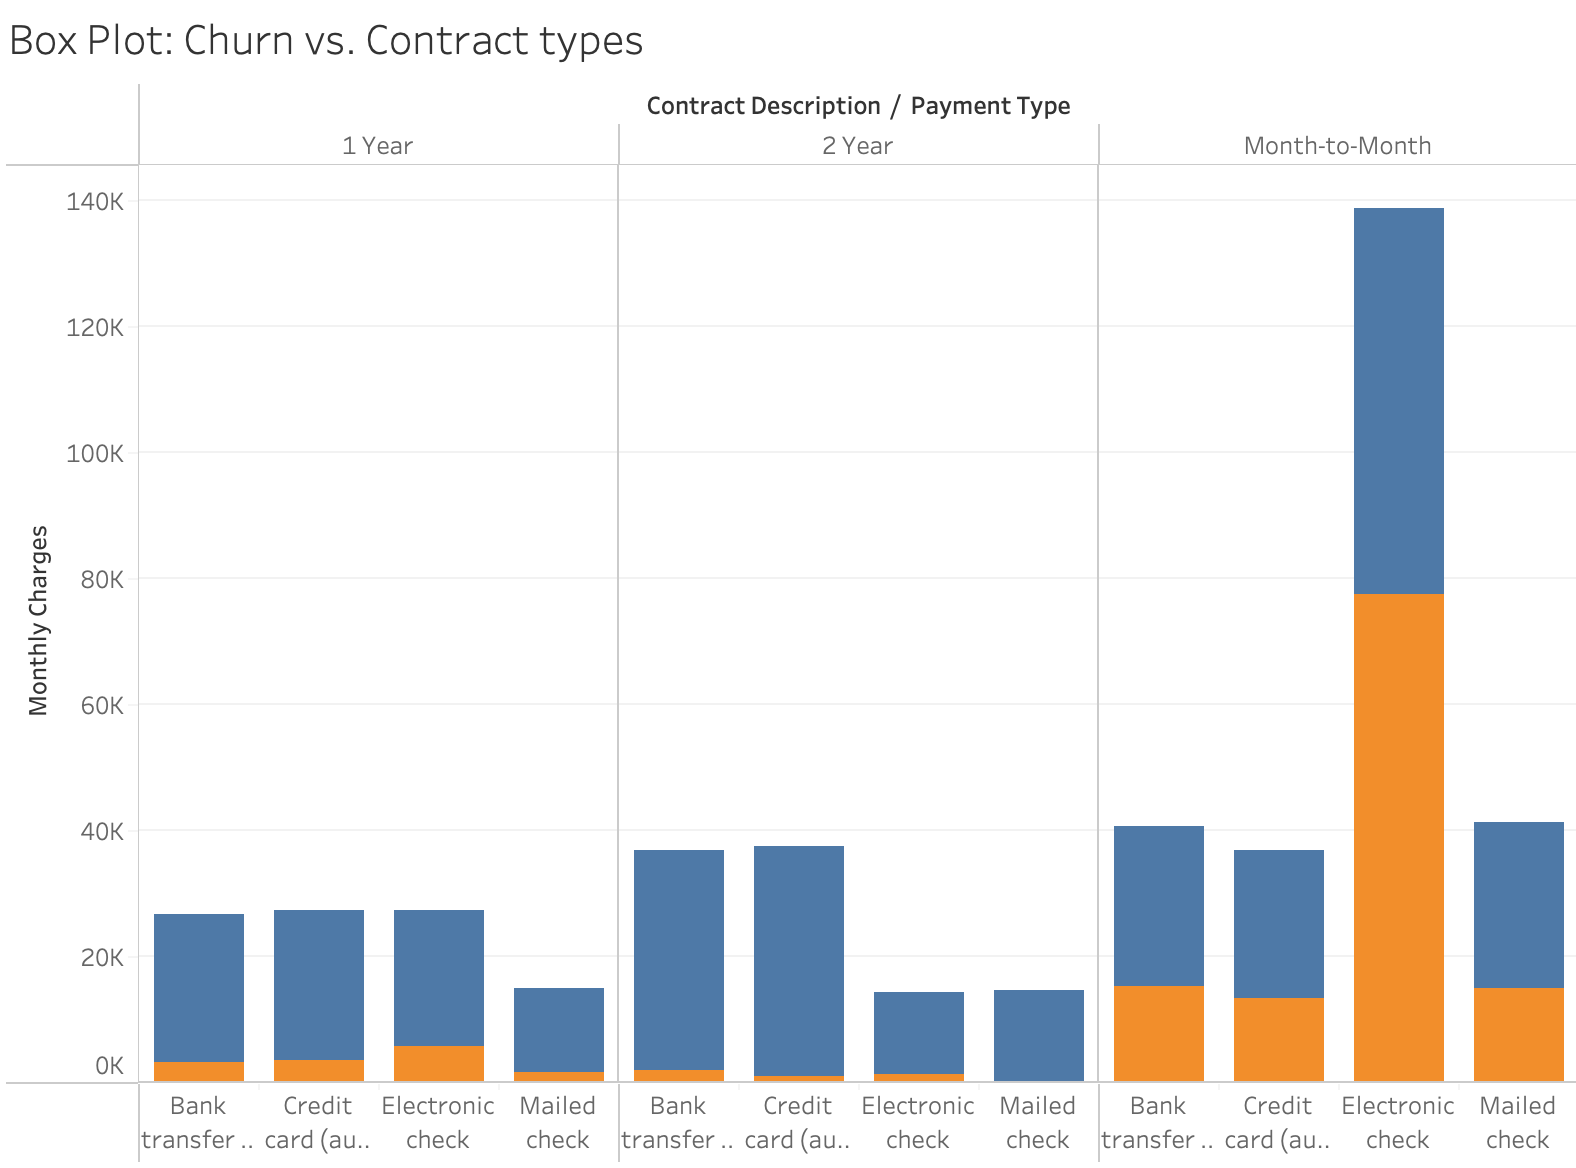

#### This is a good representation that there is a correlation of churn rate to the monthly payments AND the electronic checks as pyament type.

#### What does this loss of churn look like financially for Telco? 

In [7]:
df[df.churn == "Yes"].monthly_charges.sum()  ##Total of monthly payments that will be lost from these customers

139161.35

#### From %% of Telco payment types, E-checks make up 60.57% of those lossed churn payments.

In [8]:
df[df.churn == "Yes"].monthly_charges.sum()*.6057

84290.029695

### Takeaway: (Largest loss happening)
#### Telco lost $84,000. this month alone JUST from their e-check/month-to-month payment options. 

In [ ]:
#df[df.churn == "Yes"].tenure.mean() 